# <p style="background-color:green;font-family:newtimeroman;font-size:100%;color:white;text-align:center;border-radius:20px 20px;"><b>Boosting Methods Capstone Project (Titanic Prediction)</b></p>

# Titanic Dataset Overview

The Titanic dataset is a popular dataset used for binary classification tasks, primarily to predict whether a passenger survived the Titanic disaster. It contains information about passengers and their attributes.

## Key Features
- **PassengerId**: Unique identifier for each passenger.
- **Survived**: Survival status (0 = Did not survive, 1 = Survived).
- **Pclass**: Passenger class (1 = First, 2 = Second, 3 = Third).
- **Name**: Name of the passenger.
- **Sex**: Gender of the passenger (male/female).
- **Age**: Age of the passenger in years.
- **SibSp**: Number of siblings/spouses aboard the Titanic.
- **Parch**: Number of parents/children aboard the Titanic.
- **Ticket**: Ticket number.
- **Fare**: Fare paid for the ticket.
- **Cabin**: Cabin number (if available).
- **Embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

The dataset is commonly used to:
- Explore and analyze historical data.
- Apply machine learning algorithms for predictive modeling.
- Understand feature engineering and handling missing values.

## Import Library

In [83]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,f1_score, classification_report,confusion_matrix
from sklearn.metrics import  recall_score, precision_score, roc_auc_score, auc
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  GridSearchCV
from yellowbrick.classifier import ClassPredictionError, ROCAUC
from sklearn.pipeline  import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")


plt.rcParams["figure.figsize"] = (10,6)   # default: (6.4, 4.8)
pd.set_option('display.max_columns', 500) # default: 20
pd.set_option('display.max_rows', 500)    # default: 10
pd.options.display.float_format = '{:.3f}'.format

In [84]:
# Loading dataset
df0 = pd.read_csv("train.csv")
df = df0.copy()

In [ ]:
# Loading test dataset
test = pd.read_csv('test.csv')

In [86]:
# Store our passenger ID for easy access. We'll need this at the end of the project to submit our answer.
test_IDs = test['PassengerId']

## Data Preparation

In [87]:
# Display the first 5 rows of the DataFrame
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [88]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.500,0,0,330911,7.829,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000,1,0,363272,7.000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.000,0,0,240276,9.688,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.000,0,0,315154,8.662,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000,1,1,3101298,12.287,NaN,S


In [89]:
# Provides a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [90]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [91]:
# Generates descriptive statistics of numerical columns and transposes the result
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000,446.000,257.354,1.000,223.500,446.000,668.500,891.000
Survived,891.000,0.384,0.487,0.000,0.000,0.000,1.000,1.000
Pclass,891.000,2.309,0.836,1.000,2.000,3.000,3.000,3.000
Age,714.000,29.699,14.526,0.420,20.125,28.000,38.000,80.000
SibSp,891.000,0.523,1.103,0.000,0.000,0.000,1.000,8.000
Parch,891.000,0.382,0.806,0.000,0.000,0.000,0.000,6.000
Fare,891.000,32.204,49.693,0.000,7.910,14.454,31.000,512.329


In [92]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.000,1100.500,120.810,892.000,996.250,1100.500,1204.750,1309.000
Pclass,418.000,2.266,0.842,1.000,1.000,3.000,3.000,3.000
Age,332.000,30.273,14.181,0.170,21.000,27.000,39.000,76.000
SibSp,418.000,0.447,0.897,0.000,0.000,0.000,1.000,8.000
Parch,418.000,0.392,0.981,0.000,0.000,0.000,0.000,9.000
Fare,417.000,35.627,55.908,0.000,7.896,14.454,31.500,512.329


In [ ]:
# Function to generate a summary of the DataFrame
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

summary(df)

Data shape: (891, 12)
___________________________
Data Types:
object     5
int64      5
float64    2
Name: Types, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
Age,float64,714,89,177,0.420,80.000
Cabin,object,204,148,687,NaN,NaN
Embarked,object,889,4,2,NaN,NaN
Fare,float64,891,248,0,0.000,512.329
Name,object,891,891,0,"Abbing, Mr. Anthony","van Melkebeke, Mr. Philemon"
Parch,int64,891,7,0,0,6
PassengerId,int64,891,891,0,1,891
Pclass,int64,891,3,0,1,3
Sex,object,891,2,0,female,male
SibSp,int64,891,7,0,0,8


In [94]:
df.shape

(891, 12)

In [95]:
test.shape

(418, 11)

In [96]:
df.duplicated().sum()

0

In [97]:
# Missing values control
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [98]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Exploratory Data Analysis (EDA)

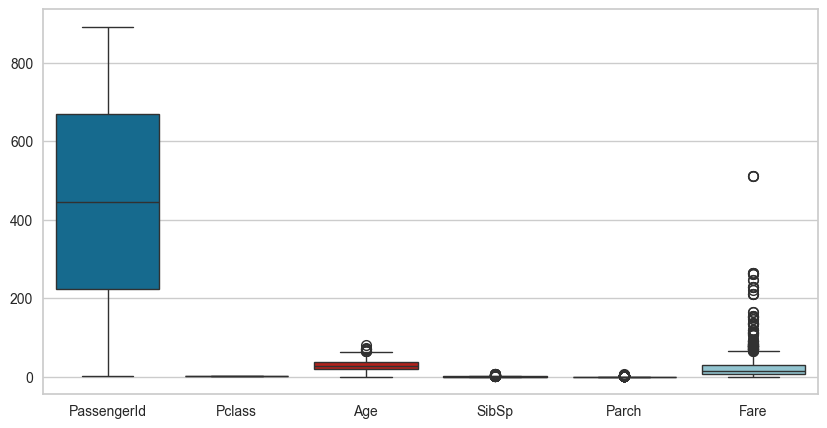

In [99]:
# Performing outlier detection and plotting boxplots for all features.

plt.figure(figsize=(10,5))
sns.boxplot(data=df.drop("Survived", axis=1));

In [100]:
# Dropping the Cabin column due to too many missing values
df.drop(columns='Cabin', inplace=True)

In [101]:
test.drop(columns='Cabin', inplace=True)

In [102]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [103]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)   # Filling missing values with the mode value

In [104]:
df['Age'].value_counts()

24.000    30
22.000    27
18.000    26
19.000    25
28.000    25
30.000    25
21.000    24
25.000    23
36.000    22
29.000    20
32.000    18
35.000    18
27.000    18
26.000    18
16.000    17
31.000    17
20.000    15
34.000    15
33.000    15
23.000    15
39.000    14
40.000    13
17.000    13
42.000    13
45.000    12
38.000    11
50.000    10
2.000     10
4.000     10
44.000     9
48.000     9
47.000     9
54.000     8
9.000      8
1.000      7
51.000     7
14.000     6
52.000     6
37.000     6
49.000     6
41.000     6
3.000      6
58.000     5
15.000     5
43.000     5
62.000     4
56.000     4
5.000      4
11.000     4
60.000     4
8.000      4
6.000      3
46.000     3
61.000     3
65.000     3
7.000      3
10.000     2
64.000     2
13.000     2
63.000     2
30.500     2
57.000     2
70.000     2
0.750      2
71.000     2
59.000     2
0.830      2
40.500     2
55.000     2
32.500     2
28.500     2
45.500     2
34.500     1
0.420      1
0.670      1
66.000     1
24.500     1

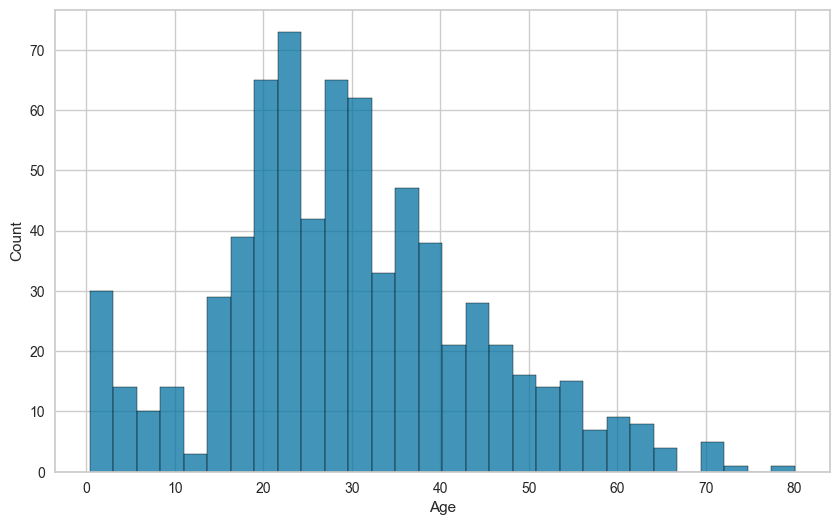

In [105]:
sns.histplot(data=df, x='Age', kde=False, bins=30);

In [106]:
df['Age'].fillna(df['Age'].mean(), inplace=True)   # Filling missing values with the mean value

In [107]:
df['Age'].isnull().sum()

0

In [108]:
test['Age'].fillna(test['Age'].median(), inplace=True)   # Filling missing values with the median value

In [109]:
test['Fare'].fillna(test['Fare'].mean(), inplace=True)   # Filling missing values with the mean value

In [110]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [111]:
df.drop(columns=['Ticket','Name', 'PassengerId'], inplace=True)

In [113]:
test.drop(columns=['Ticket','Name', 'PassengerId'], inplace=True)

Text(0, 0.5, '')

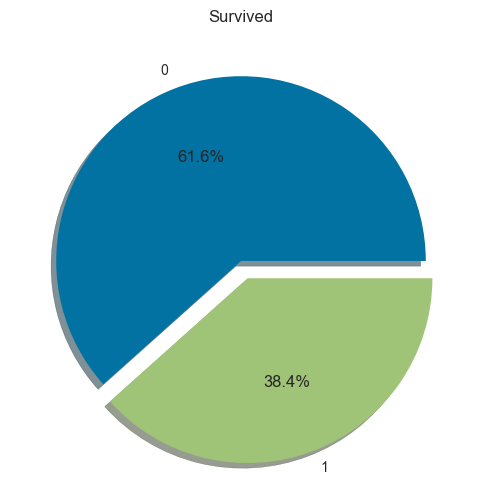

In [114]:
fig, ax = plt.subplots()
df['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax, shadow=True)
ax.set_title('Survived')
ax.set_ylabel('')  

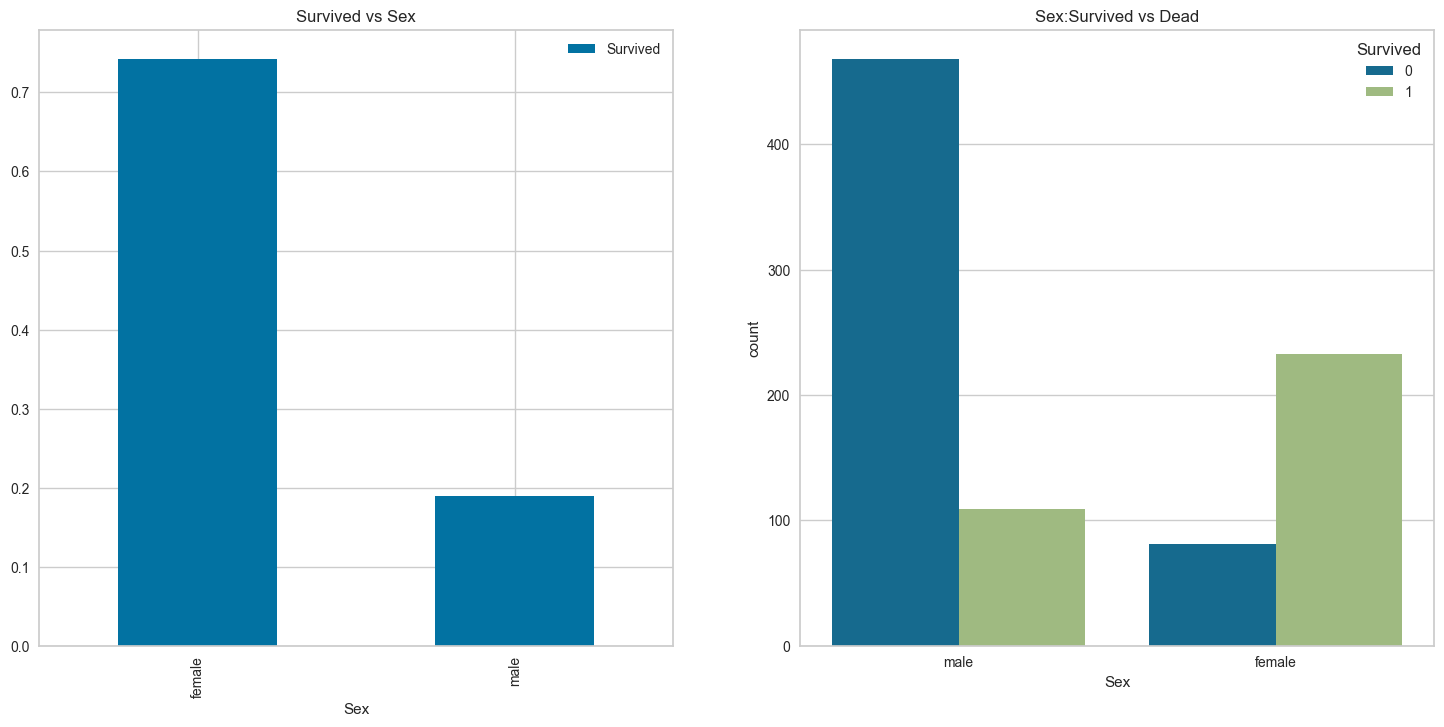

In [115]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x = 'Sex',hue='Survived',data=df,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

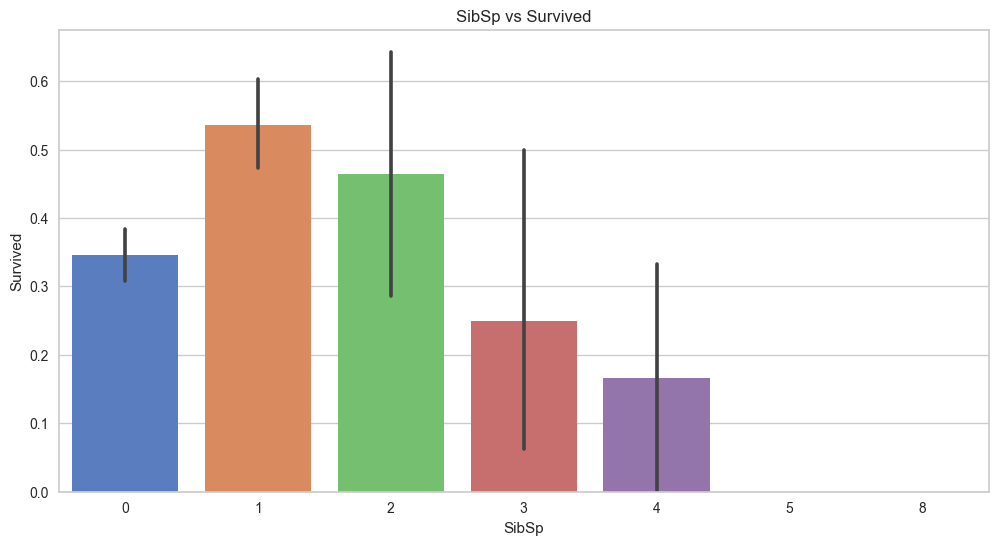

In [116]:
f, ax = plt.subplots(figsize=(12, 6)) 
sns.barplot(x='SibSp', y='Survived', data=df, ax=ax, palette='muted')  
ax.set_title('SibSp vs Survived')

plt.show() 


#### Fare feature

In [117]:
print('Highest Fare was:',df['Fare'].max())
print('Lowest Fare was:',df['Fare'].min())
print('Average Fare was:',df['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


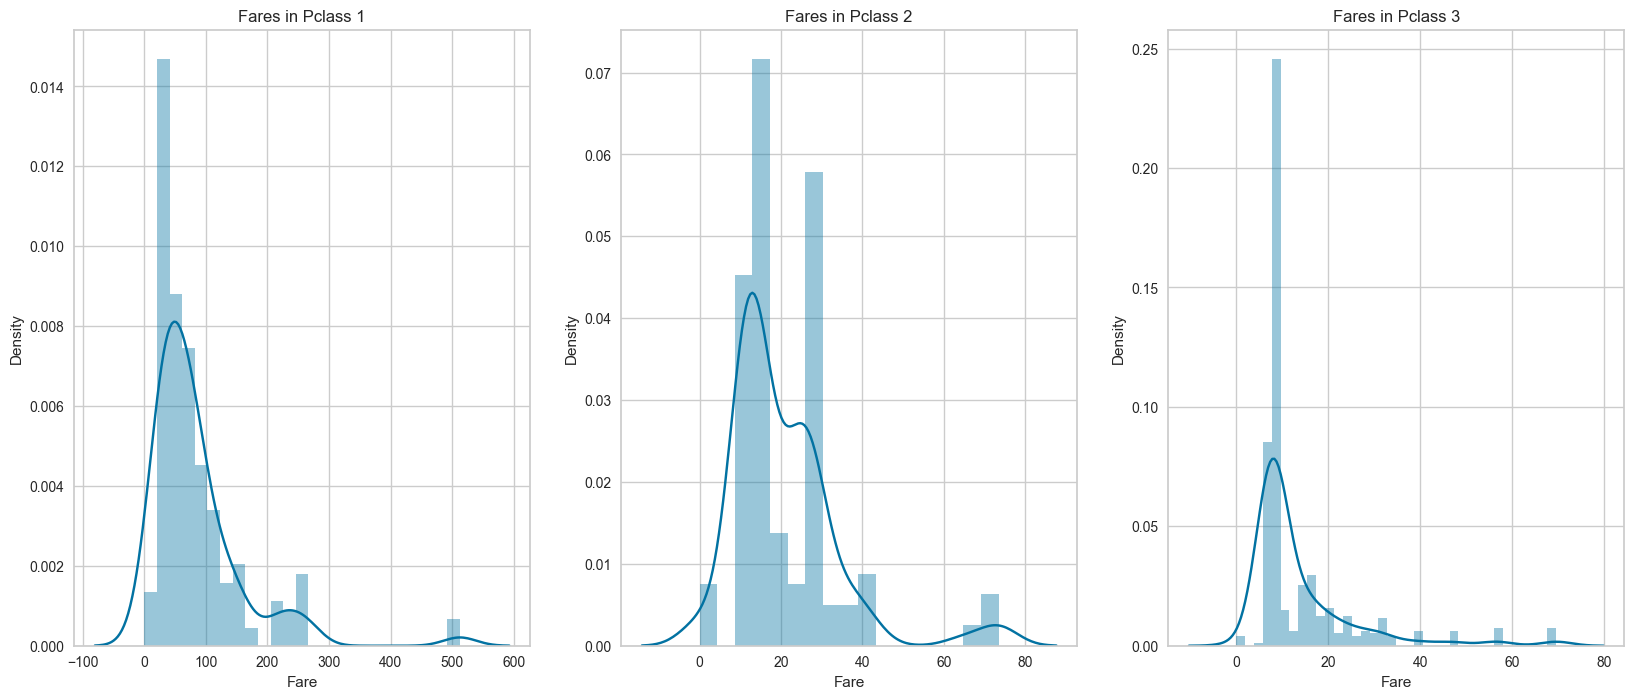

In [118]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(df[df['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(df[df['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(df[df['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

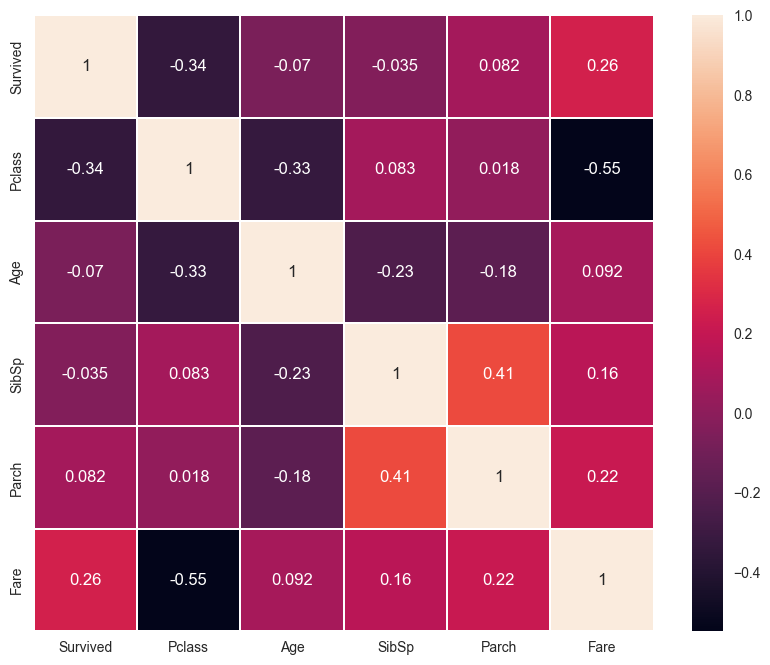

In [119]:
# Correlation Between The Features
sns.heatmap(df.corr(),annot=True,linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [120]:
df['Sex'].replace(['male','female'],[0,1],inplace=True)
df['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)

In [121]:
test['Sex'].replace(['male','female'],[0,1],inplace=True)
test['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)

In [122]:
# Saving  dataset as a CSV file.

df.to_csv("Titanic_EDA.csv", index = False)

In [123]:
gender_submission=pd.read_csv("gender_submission.csv")
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Train | Test Split

In [124]:
# Splitting the dataset into features and target variable.
X = df.drop("Survived", axis = 1)
y = df["Survived"]

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    stratify=y,                                                   
                                                    random_state=42) # default shuffle is True

# Splitting the data into training and testing sets using the train_test_split function 

# AdaBoost

In [126]:
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [127]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [128]:
eval_metric(ada_model, X_train, y_train, X_test, y_test)    

Test_Set
[[90 20]
 [21 48]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       110
           1       0.71      0.70      0.70        69

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179


Train_Set
[[391  48]
 [ 64 209]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       439
           1       0.81      0.77      0.79       273

    accuracy                           0.84       712
   macro avg       0.84      0.83      0.83       712
weighted avg       0.84      0.84      0.84       712



In [129]:
model = AdaBoostClassifier(n_estimators=50, random_state=42)
scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=["accuracy"],
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.803
train_accuracy   0.846
dtype: float64

## GridSearch(best parameters)

In [130]:
param_grid = {'n_estimators': [50, 100, 200, 300, 400],
                'learning_rate': [1, 0.1,0.2, 0.3, 0.01, 0.001]}

In [131]:
model = AdaBoostClassifier(random_state=42)
ada_grid_model = GridSearchCV(model, param_grid, scoring='accuracy', cv=10, n_jobs=-1, return_train_score=True)
ada_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [1, 0.1, 0.2, 0.3, 0.01, 0.001],
                         'n_estimators': [50, 100, 200, 300, 400]},
             return_train_score=True, scoring='accuracy')

In [132]:
y_pred = ada_grid_model.predict(X_test)
y_pred_proba = ada_grid_model.predict_proba(X_test)
ada_f1 = f1_score(y_test, y_pred)
ada_accuracy = accuracy_score(y_test, y_pred)
ada_auc = roc_auc_score(y_test, y_pred_proba[:,1])

In [133]:
eval_metric(ada_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[90 20]
 [19 50]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       110
           1       0.71      0.72      0.72        69

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179


Train_Set
[[391  48]
 [ 55 218]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       439
           1       0.82      0.80      0.81       273

    accuracy                           0.86       712
   macro avg       0.85      0.84      0.85       712
weighted avg       0.85      0.86      0.85       712



### Prediction with best hyperparameters

In [134]:
ada_test=GradientBoostingClassifier(
 learning_rate= 0.1,
 n_estimators= 300)

ada_test.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=300)

In [135]:
sub_pred1=ada_test.predict(test)
accuracy_score(gender_submission.Survived.values, sub_pred1)

0.8373205741626795

### Feature Importances

In [136]:
model = AdaBoostClassifier(learning_rate=0.1,n_estimators=300, random_state=42)
model.fit(X_train, y_train) 
model.feature_importances_

array([0.1       , 0.12333333, 0.31333333, 0.07333333, 0.04333333,
       0.30333333, 0.04333333])

In [137]:
feats = pd.DataFrame(index=X.columns, data= model.feature_importances_, columns=['ada_feature_importance'])
ada_imp_feats = feats.sort_values("ada_feature_importance", ascending = False)
ada_imp_feats

,ada_feature_importance
Age,0.313
Fare,0.303
Sex,0.123
Pclass,0.100
SibSp,0.073
Parch,0.043
Embarked,0.043


### Evaluating ROC Curves, Precision Recall Curve

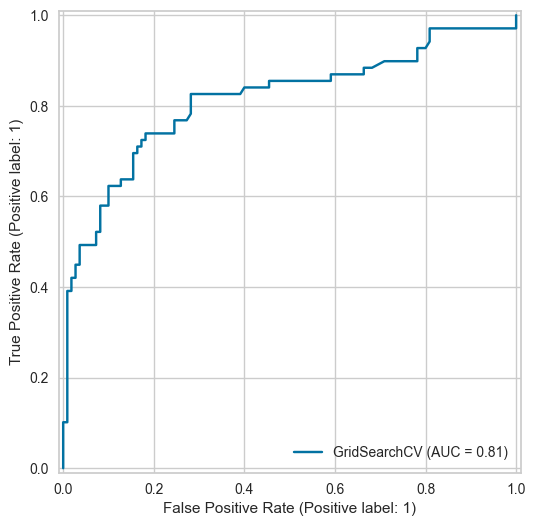

In [140]:
RocCurveDisplay.from_estimator(ada_grid_model, X_test, y_test);

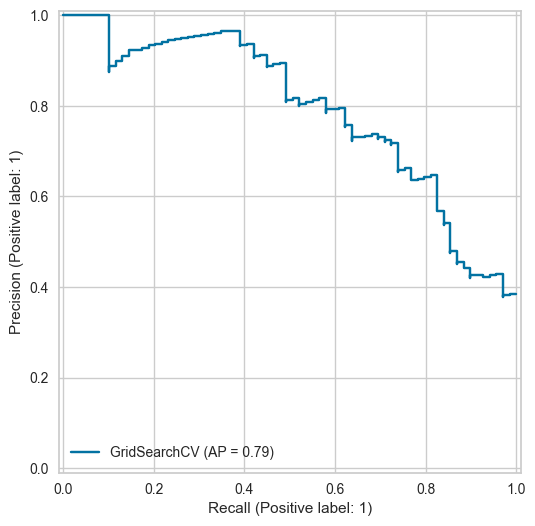

In [141]:
PrecisionRecallDisplay.from_estimator(ada_grid_model, X_test, y_test);

# GradientBoosting

In [142]:
gradient_model = GradientBoostingClassifier( random_state=42) 
gradient_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [143]:
eval_metric(gradient_model, X_train, y_train, X_test, y_test)

Test_Set
[[98 12]
 [24 45]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       110
           1       0.79      0.65      0.71        69

    accuracy                           0.80       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179


Train_Set
[[420  19]
 [ 47 226]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       439
           1       0.92      0.83      0.87       273

    accuracy                           0.91       712
   macro avg       0.91      0.89      0.90       712
weighted avg       0.91      0.91      0.91       712



In [144]:
model = GradientBoostingClassifier(random_state=42)
scores = cross_validate(model, X_train, y_train, scoring = ['accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.833
train_accuracy   0.909
dtype: float64

## GridSearch(best parameters)

In [145]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "subsample": [0.5, 0.8, 1],
    "max_features": [None, 2, 3,4],
    "learning_rate": [0.01, 0.1, 0.5, 1],
    'max_depth': [3, 4, 5]
}

In [146]:
gb_model = GradientBoostingClassifier(random_state = 42)
gb_grid_model = GridSearchCV(gb_model,
                       param_grid,
                       scoring="accuracy",
                       n_jobs=-1,
                       return_train_score=True)
gb_grid_model.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [3, 4, 5],
                         'max_features': [None, 2, 3, 4],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.5, 0.8, 1]},
             return_train_score=True, scoring='accuracy')

In [147]:
y_pred = gb_grid_model.predict(X_test)
y_pred_proba = gb_grid_model.predict_proba(X_test)
gb_f1 = f1_score(y_test, y_pred)
gb_accuracy = accuracy_score(y_test, y_pred)
gb_auc = roc_auc_score(y_test, y_pred)

In [148]:
eval_metric(gb_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[105   5]
 [ 33  36]]
              precision    recall  f1-score   support

           0       0.76      0.95      0.85       110
           1       0.88      0.52      0.65        69

    accuracy                           0.79       179
   macro avg       0.82      0.74      0.75       179
weighted avg       0.81      0.79      0.77       179


Train_Set
[[429  10]
 [ 98 175]]
              precision    recall  f1-score   support

           0       0.81      0.98      0.89       439
           1       0.95      0.64      0.76       273

    accuracy                           0.85       712
   macro avg       0.88      0.81      0.83       712
weighted avg       0.86      0.85      0.84       712



### Prediction with Best Hyper Parameters

In [149]:
gb=GradientBoostingClassifier(
 learning_rate= 0.01,
 max_depth= 4,
 n_estimators= 200,
 max_features= 2,
 subsample= 0.8)

gb.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, max_features=2,
                           n_estimators=200, subsample=0.8)

In [150]:
sub_pred2=gb.predict(test)
accuracy_score(gender_submission.Survived.values, sub_pred2)

0.8755980861244019

### Feature Importances

In [151]:
model = GradientBoostingClassifier(learning_rate=0.01, max_features=2, n_estimators=300,
                           random_state=42, subsample=0.5)
model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['gb_feature_importance'])
grad_imp_feats = feats.sort_values("gb_feature_importance", ascending= False)
grad_imp_feats

,gb_feature_importance
Sex,0.431
Fare,0.174
Pclass,0.144
Age,0.136
SibSp,0.050
Embarked,0.034
Parch,0.033


### Evaluating ROC Curves and AUC

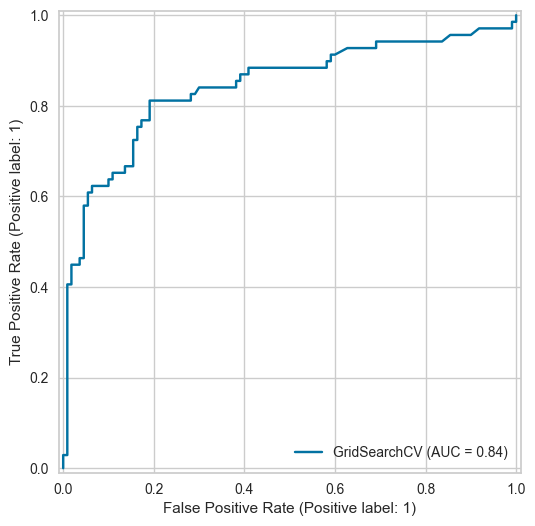

In [152]:
RocCurveDisplay.from_estimator(gb_grid_model, X_test, y_test);

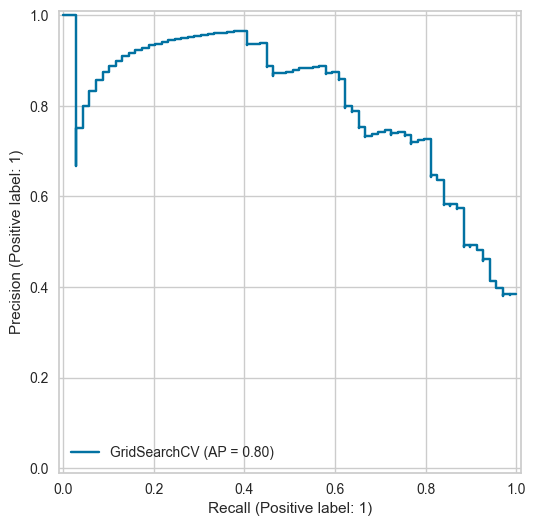

In [153]:
PrecisionRecallDisplay.from_estimator(gb_grid_model, X_test, y_test);

# XGBoost

In [154]:
xgb_model = XGBClassifier(random_state=101)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=101, ...)

In [155]:
eval_metric(xgb_model, X_train, y_train, X_test, y_test)

Test_Set
[[93 17]
 [19 50]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.75      0.72      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


Train_Set
[[434   5]
 [ 14 259]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       439
           1       0.98      0.95      0.96       273

    accuracy                           0.97       712
   macro avg       0.97      0.97      0.97       712
weighted avg       0.97      0.97      0.97       712



### GridSearch(best parameters)

In [156]:
param_grid = {
    "n_estimators": [50, 100, 200, 250, 300],
    'max_depth': [3, 4, 5,6,7],
    "learning_rate": [0.1, 0.2, 0.3],
    "subsample": [0.5, 0.8, 1],
    "booster":['dart','gbtree'],
    'reg_alpha':[0,1],
    "colsample_bytree": [0.5, 0.7, 1]
}

In [157]:
xgb_model = XGBClassifier()
xgb_grid_model = GridSearchCV(xgb_model, param_grid, scoring = "accuracy", n_jobs = -1, 
                        return_train_score=True)
xgb_grid_model.fit(X_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'booster': ['dart', 'gbtree'],
                         'colsample_bytree': [0.5, 0.7, 1],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [3, 4, 5, 6, 7],
                         'n_estimators': [50, 100, 200, 250, 300],
                         'reg_alpha': [0, 1], 'subsample': [0.5, 0.8, 1]},
             return_train_score=True, scoring='accuracy')

In [158]:
y_pred = xgb_grid_model.predict(X_test)
y_pred_proba = xgb_grid_model.predict_proba(X_test)
xgb_f1 = f1_score(y_test, y_pred)
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred)

In [159]:
eval_metric(xgb_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[98 12]
 [22 47]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       110
           1       0.80      0.68      0.73        69

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179


Train_Set
[[416  23]
 [ 47 226]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       439
           1       0.91      0.83      0.87       273

    accuracy                           0.90       712
   macro avg       0.90      0.89      0.89       712
weighted avg       0.90      0.90      0.90       712



In [161]:
xgb_grid_model.best_params_

{'booster': 'dart',
 'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 250,
 'reg_alpha': 1,
 'subsample': 0.5}

### Prediction with Best Hyper Parameters

In [162]:
xgb_test=XGBClassifier(booster='dart',
                        colsample_bytree= 0.7,
                        learning_rate= 0.1,
                        max_depth= 5,
                        n_estimators= 250,
                        reg_alpha= 1,
                        subsample= 0.5)

xgb_test.fit(X_train,y_train)

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [163]:
sub_pred3=xgb_test.predict(test)
accuracy_score(gender_submission.Survived.values, sub_pred3)

0.868421052631579

### Feature Importances

In [164]:
model = XGBClassifier(n_estimators= 50, colsample_bytree = 0.7, subsample= 0.8, learning_rate = 0.1,
                      max_depth= 3, random_state = 42)

model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['xgb_feature_importance'])
xgb_imp_feats = feats.sort_values("xgb_feature_importance", ascending= False)
xgb_imp_feats

,xgb_feature_importance
Sex,0.540
Pclass,0.136
Fare,0.086
Embarked,0.065
Age,0.061
Parch,0.058
SibSp,0.054


### Feature importance comparison

In [165]:
pd.concat([ada_imp_feats, grad_imp_feats, xgb_imp_feats], axis=1)

,ada_feature_importance,gb_feature_importance,xgb_feature_importance
Age,0.313,0.136,0.061
Fare,0.303,0.174,0.086
Sex,0.123,0.431,0.540
Pclass,0.100,0.144,0.136
SibSp,0.073,0.050,0.054
Parch,0.043,0.033,0.058
Embarked,0.043,0.034,0.065


### Evaluating ROC Curves and AUC

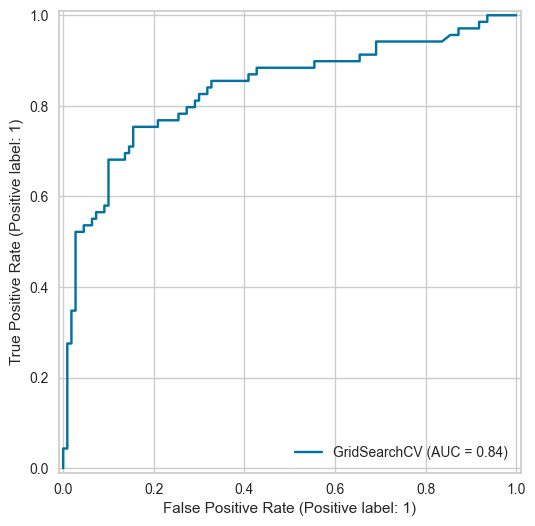

In [166]:
RocCurveDisplay.from_estimator(xgb_grid_model, X_test, y_test);

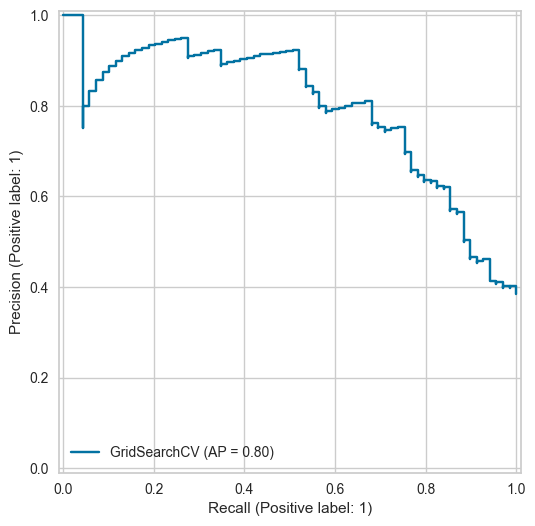

In [168]:
PrecisionRecallDisplay.from_estimator(xgb_grid_model, X_test, y_test);

## Comparing Models Performance

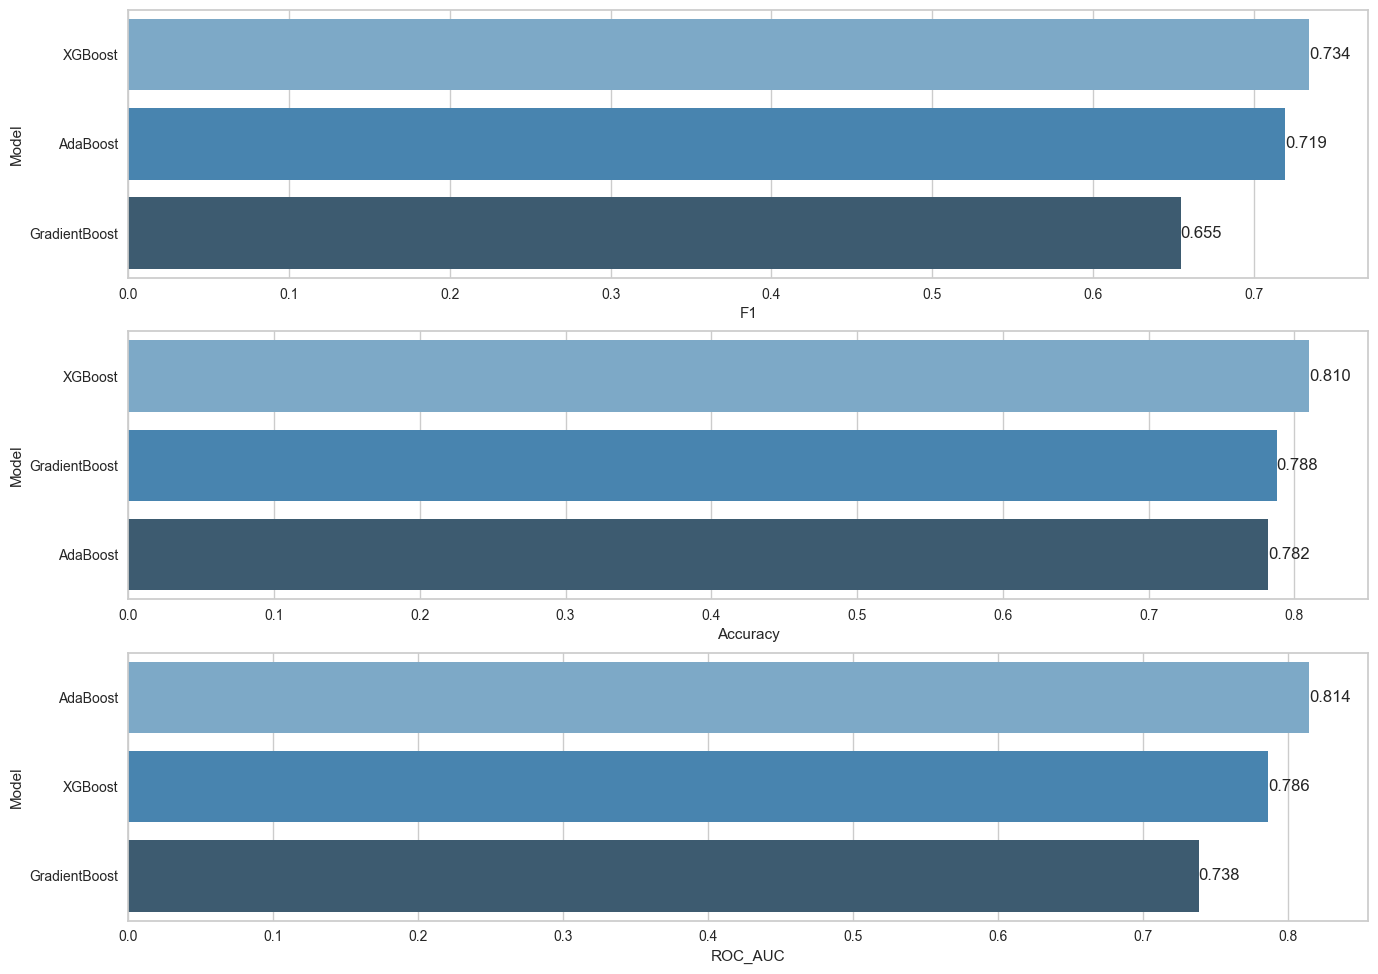

In [169]:
compare = pd.DataFrame({"Model": ["AdaBoost", "GradientBoost", "XGBoost"],
                        "Accuracy": [ada_accuracy, gb_accuracy, xgb_accuracy],
                        "F1": [ada_f1, gb_f1, xgb_f1],
                        "ROC_AUC": [ada_auc, gb_auc, xgb_auc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(16,16))

plt.subplot(411)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(412)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(413)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.show()

# Submitting

In [171]:
pred_validation = xgb_grid_model.predict(test)

In [172]:
submit_df = pd.DataFrame({'PassengerId': test_IDs, 'Survived': pred_validation})
submit_df['Survived']  = submit_df['Survived'].astype(int)

In [173]:
submit_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [174]:
submit_df.to_csv('submission.csv', index=False)